#Task:
Mixture of Gaussian, EM-Algorithm
<br>
Apply EM algorithm to fit a mixture of gaussian distribution to the following datasets: 

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
%matplotlib inline

##Dataset 1

In [2]:
# Make some random data in 2D.
np.random.seed(150)
means = np.array([[2.1, 4.5],
                  [2.0, 2.7],
                  [3.5, 5.6]])
covariances = [np.array([[0.20, 0.10], [0.10, 0.60]]),
               np.array([[0.35, 0.22], [0.22, 0.15]]),
               np.array([[0.06, 0.05], [0.05, 1.30]])]
amplitudes = [5, 1, 2]
factor = 100
data = np.zeros((1, 2))
for i in range(len(means)):
    data = np.concatenate([data,
         np.random.multivariate_normal(means[i], covariances[i],
                                           size=factor * amplitudes[i])])
data = data[1:, :]
    #data

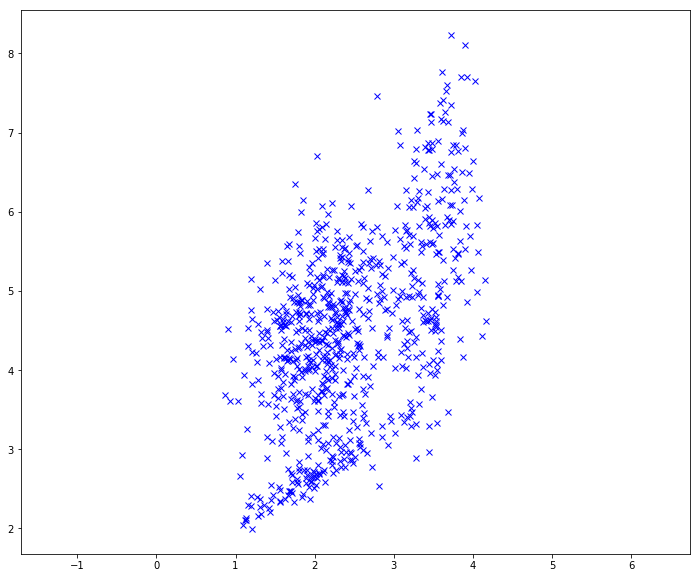

In [16]:
plt.figure(figsize=(12,10))
plt.plot(data[:,0], data[:,1], 'bx')
plt.axis('equal')
plt.show()

In [13]:
gmm = GaussianMixture(n_components=3)
gmm.fit(data)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [20]:
print("Means : ")
print(gmm.means_)
print('\n')
print("Covariances_ : ")
print(gmm.covariances_)

Means : 
[[ 3.4753287   5.47075048]
 [ 2.03417068  2.72313909]
 [ 2.06836917  4.48075646]]


Covariances_ : 
[[[ 0.08623651  0.11000934]
  [ 0.11000934  1.28855809]]

 [[ 0.27110053  0.16767028]
  [ 0.16767028  0.12021932]]

 [[ 0.19179388  0.09628772]
  [ 0.09628772  0.54246666]]]


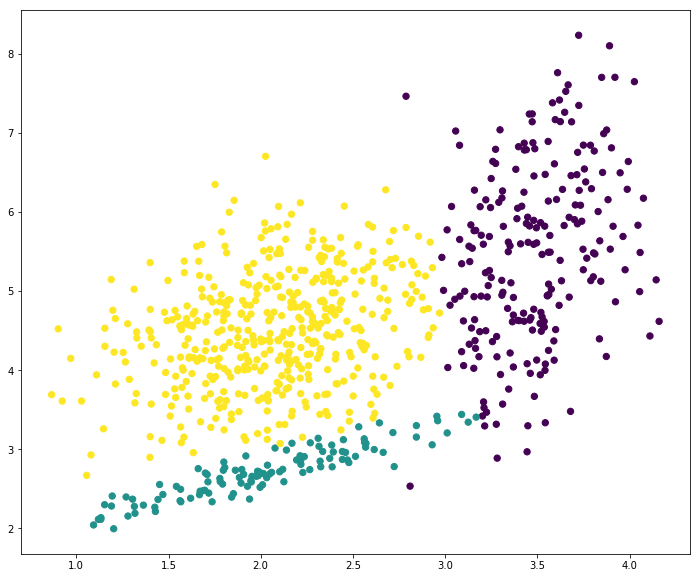

In [25]:
labels = gmm.predict(data)
plt.figure(figsize=(12,10))
plt.scatter(data[:, 0], data[:, 1], c=labels, s=40, cmap='viridis');

In [36]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

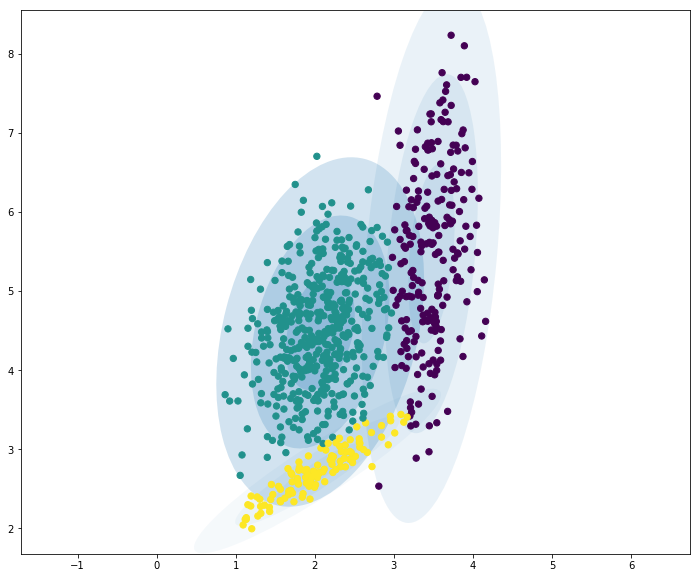

In [37]:
plt.figure(figsize=(12,10))
plot_gmm(gmm, data)

##Dataset 2

In [47]:
    # Make some random data in 2D.
    np.random.seed(150)
    means = np.array([[1.1, 6.5],
                      [2.5, 4.7],
                      #[3.0, 2.6],
                      [3.0, 3.3]])
    covariances = [np.array([[0.55, -0.10], [-0.10, 0.25]]),
                   np.array([[0.35, 0.22], [0.22, 0.20]]),
                   #np.array([[0.06, 0.05], [0.05, 1.30]]),
                   np.array([[0.06, 0.05], [0.05, 1.30]])]
    amplitudes = [4, 1, 3]
    factor = 100

    data = np.zeros((1, 2))
    for i in range(len(means)):
        data = np.concatenate([data,
            np.random.multivariate_normal(means[i], covariances[i],
                                                size=factor * amplitudes[i])])
    data = data[1:, :]

Visualise the results (plot the samples color coded by fit mixture component, plot ellipsoids for Gaussians)

# Results
The output for the Dataset1 can look like: 

<img src="files/04_Exercise1_MoG_EM.png">